<h2 style='color:blue' align="center">Support Vector Machine Tutorial Using Python Sklearn</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plotSVMBoundaries(training, label_train, classifier, support_vectors = []):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # classifier: sklearn classifier model, must have a predict() function
    #
    # Total number of classes
    nclass =  len(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 0.01
    min_x = np.floor(min(training[:, 0])) - 0.01
    max_y = np.ceil(max(training[:, 1])) + 0.01
    min_y = np.floor(min(training[:, 1])) - 0.01

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    pred_label = classifier.predict(xy)
    
    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    #turn on interactive mode
    plt.figure()
    plt.ion()

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    unique_labels = np.unique(label_train)
    # plot the class training data.
    plt.plot(training[label_train == unique_labels[0], 0],training[label_train == unique_labels[0], 1], 'rx')
    plt.plot(training[label_train == unique_labels[1], 0],training[label_train == unique_labels[1], 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == unique_labels[2], 0],training[label_train == unique_labels[2], 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot support vectors
    if len(support_vectors)>0:
        sv_x = support_vectors[:, 0]
        sv_y = support_vectors[:, 1]
        plt.scatter(sv_x, sv_y, s = 100, c = 'blue')

    plt.show()

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Separate the three classes (for visualization)**

In [8]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

**Use only 2-D features: "Sepal length" and "Sepal Width" (take Setosa and Versicolor as an example -- 2-class classification)**

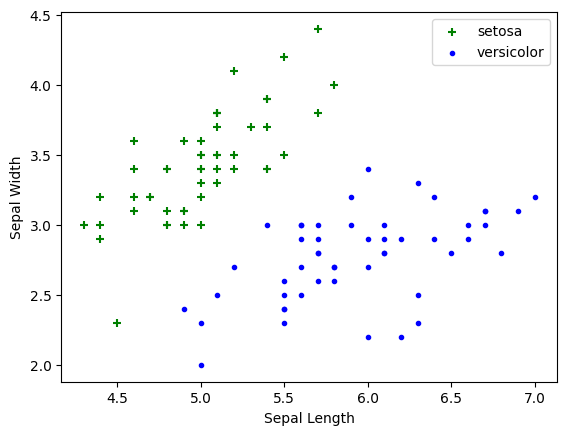

In [16]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+',label='setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.',label='versicolor')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='*',label='virginica')
plt.legend()

**Use another 2-D features: "Petal Length" and "Petal Width" (take Setosa and Versicolor as an example -- 2-class classification)**

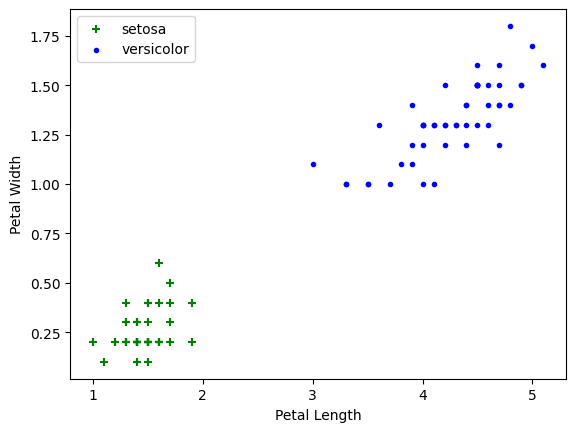

In [17]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+',label='setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.',label='versicolor')
#plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red",marker='*',label='versicolor')
plt.legend()

**Train Using Support Vector Machine (SVM)**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [22]:
from sklearn.svm import SVC
model = SVC()

In [23]:
model.fit(X_train, y_train)

SVC()

In [24]:
tr_acc = model.score(X_train, y_train)
te_acc = model.score(X_test, y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))

train acc = 0.975, test acc = 1.0


In [25]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[2 2 2 0 1 0 2 2 1 1]


In [26]:
X_test.values[:,:2].shape

(30, 2)

**Tune parameters**

**1. Regularization (C)**

High C -> prioritize fewer mistakes

Low C -> prioritize simplicity 

In [27]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
tr_acc = model_C.score(X_train, y_train)
te_acc = model_C.score(X_test, y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))

train acc = 0.9833333333333333, test acc = 0.9666666666666667


train acc = 0.7833333333333333, test acc = 0.8333333333333334


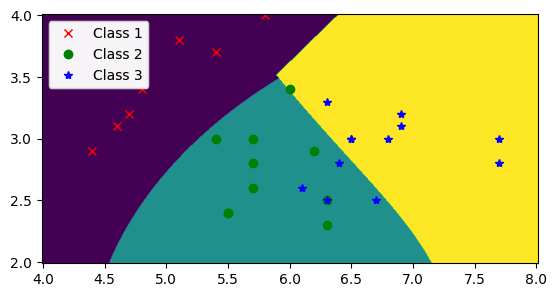

In [28]:
model_C = SVC(C=10)
model_C.fit(X_train.values[:,:2], y_train)
tr_acc = model_C.score(X_train.values[:,:2], y_train)
te_acc = model_C.score(X_test.values[:,:2], y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))
plotSVMBoundaries(X_test.values[:,:2], y_test, model_C)

In [29]:
model_C = SVC(C=0.01)
model_C.fit(X_train, y_train)
tr_acc = model_C.score(X_train, y_train)
te_acc = model_C.score(X_test, y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))

train acc = 0.35, test acc = 0.26666666666666666


train acc = 0.35, test acc = 0.26666666666666666


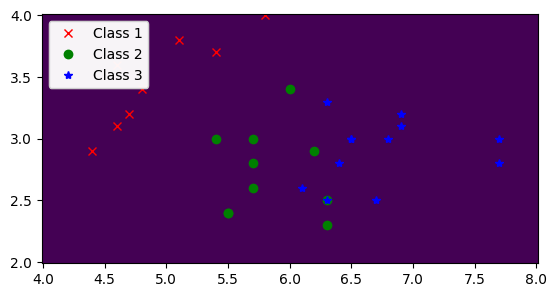

In [30]:
model_C = SVC(C=0.01)
model_C.fit(X_train.values[:,:2], y_train)
tr_acc = model_C.score(X_train.values[:,:2], y_train)
te_acc = model_C.score(X_test.values[:,:2], y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))
plotSVMBoundaries(X_test.values[:,:2], y_test, model_C)

**2. Gamma**

High gamma -> more model complexity (if too large, may overfit)

Low gamma -> less model complexity

In [21]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
tr_acc = model_g.score(X_train, y_train)
te_acc = model_g.score(X_test, y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))

train acc = 0.9916666666666667, test acc = 0.9


train acc = 0.8333333333333334, test acc = 0.8


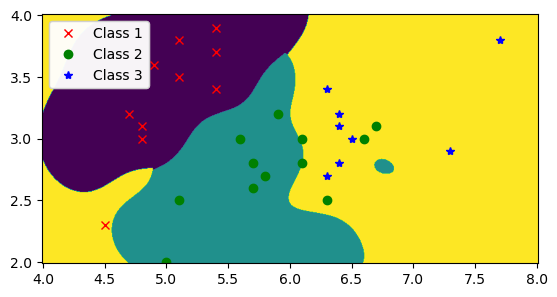

In [54]:
model_g = SVC(gamma=10)
model_g.fit(X_train.values[:,:2], y_train)
tr_acc = model_g.score(X_train.values[:,:2], y_train)
te_acc = model_g.score(X_test.values[:,:2], y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))
plotSVMBoundaries(X_test.values[:,:2], y_test, model_g)

In [22]:
model_g = SVC(gamma=1000)
model_g.fit(X_train, y_train)
tr_acc = model_g.score(X_train, y_train)
te_acc = model_g.score(X_test, y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))

train acc = 1.0, test acc = 0.26666666666666666


train acc = 0.9416666666666667, test acc = 0.5333333333333333


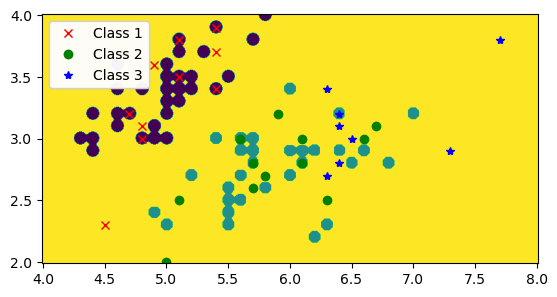

In [55]:
model_g = SVC(gamma=1000)
model_g.fit(X_train.values[:,:2], y_train)
tr_acc = model_g.score(X_train.values[:,:2], y_train)
te_acc = model_g.score(X_test.values[:,:2], y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))
plotSVMBoundaries(X_test.values[:,:2], y_test, model_g)

**3. Kernel**

In [23]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
tr_acc = model_linear_kernal.score(X_train, y_train)
te_acc = model_linear_kernal.score(X_test, y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))

train acc = 0.9916666666666667, test acc = 0.9666666666666667


train acc = 0.8083333333333333, test acc = 0.8666666666666667


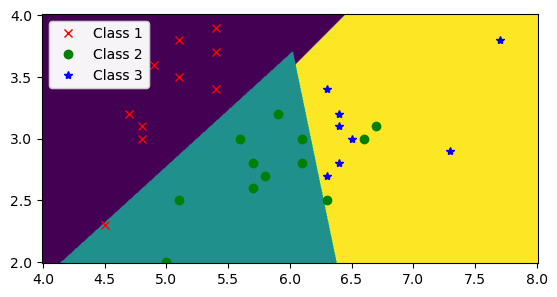

In [56]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train.values[:,:2], y_train)
tr_acc = model_linear_kernal.score(X_train.values[:,:2], y_train)
te_acc = model_linear_kernal.score(X_test.values[:,:2], y_test)
print('train acc = {}, test acc = {}'.format(tr_acc, te_acc))
plotSVMBoundaries(X_test.values[:,:2], y_test, model_linear_kernal)